In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.insert(0,'/Users/crockosi/desiobserver/cmrpythonsrc/donuts/Donut/python/Donut/')

In [22]:
# this analysis uses Ting's new QA cuts for the donut fits:
#(onedict['ZERN4']<10) & (np.abs(onedict['ZERN5'])<1.) & (np.abs(onedict['ZERN6'])<2.) & (np.abs(onedict['ZERN7'])<1) & (np.abs(onedict['ZERN8'])<1) & (np.abs(onedict['ZERN9'])<1.) & (np.abs(onedict['ZERN10'])<1.)
#as well as nele  100000
# and this analysis uses only exposures with >= 4 donuts that pass those QA cuts on all CI cameras.
# it gives *exactly* the same results as the earlier anaysis that (I think) used something closer to Aaron's old QA

In [4]:
from read_donut_fit import *
from getdonutanadata import *

PointMesh: Could not load ROOT
donutana: could not import ROOT


In [12]:
from lutdonuts import *

In [17]:
from zernforhexapod import *

In [5]:
stampdir = '/Users/crockosi/desiobserver/stamps'

In [37]:
# data: dx,dy sweeps from 20190422, xtilt,ytilt sweeps from 20190421
#20190421, x-tilt at elevation 86 - 80 degrees, az 235 - 280
#20190421, y-tilt at elevation 80 - 72, az 280 - 289
#20190422, dx elevation 81 - 86 deg, az 100 - 173
#20190422, dy elevation 86 - 80 deg, az 185 - 237

In [8]:
#alignmentsweeps
#rundonutana(stampdir,8995,9131,'20190422/sweep/')
#rundonutana(stampdir,8746,8830,'20190421/sweep/') 
s1dictall = gathermanydonutsum('/Users/crockosi/desiobserver/cmrpythonsrc/donuts/20190422/sweep')

In [10]:
s1dict = cutdonutsum(s1dictall, 4, stampdir, qacuts=True)

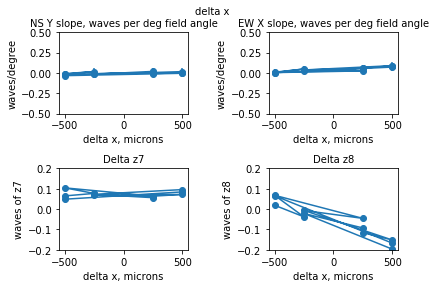

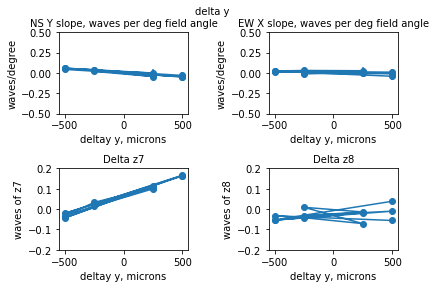

In [13]:
#nominal: -2000,-4000,z,-73,32
dxvecs = checkhexmatrix(s1dict,[-2000.,-4000.,-8070.,-73.,32.],0)
dyvecs = checkhexmatrix(s1dict,[-2000.,-4000.,-8070.,-73.,32.],1)

In [15]:
sdictall = gathermanydonutsum('/Users/crockosi/desiobserver/cmrpythonsrc/donuts/20190421/sweep')
sdict = cutdonutsum(sdictall, 4, stampdir, qacuts=True)

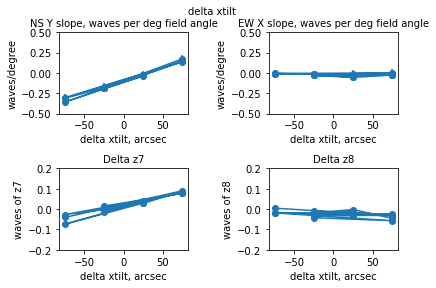

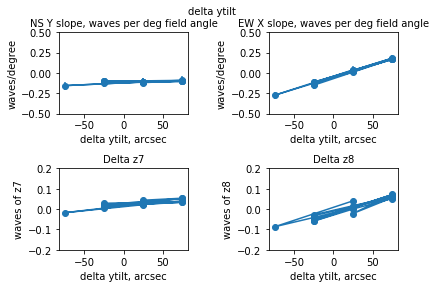

In [16]:
xtiltvecs = checkhexmatrix(sdict,[-2000.,-4000.,-8070.,-100.,25.],3)
ytiltvecs = checkhexmatrix(sdict,[-2000.,-4000.,-8070.,-100.,25.],4)

In [18]:
hexout = makehexapodmatrix(xtiltvecs,ytiltvecs,dxvecs,dyvecs)

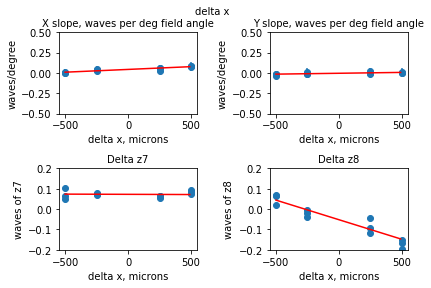

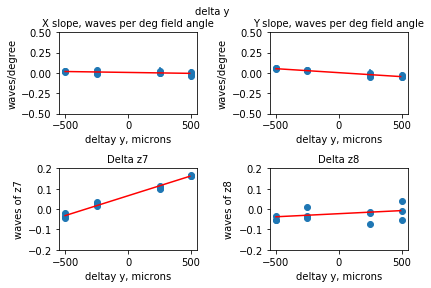

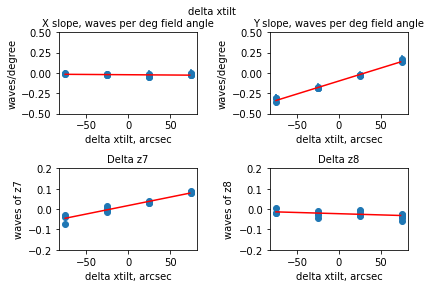

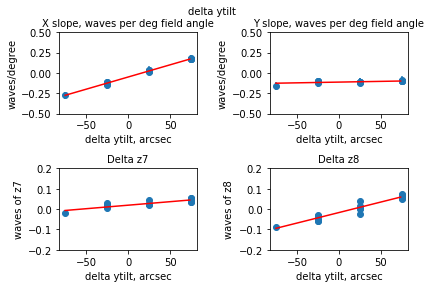

In [19]:
plotcheckhexmat(xtiltvecs,ytiltvecs,dxvecs,dyvecs,hexout['fitdict'])

In [20]:
hexout['datamatrix']

array([[ 6.82147654e-05, -2.28659640e-05, -6.86865595e-05,
         2.99936539e-03],
       [ 2.14177214e-05, -9.82113937e-05,  3.19588927e-03,
         1.80151333e-04],
       [-2.01269527e-06,  1.95506806e-04,  8.33007955e-04,
         3.45709666e-04],
       [-1.92787004e-04,  3.04473411e-05, -1.19531570e-04,
         1.03496025e-03]])

In [21]:
hexout['hexapodmatrix']

array([[ 1550.6376269 ,  -335.31732282,   742.28632626, -4683.4035854 ],
       [ -344.85549884, -1196.94581596,  4520.36280403,  -302.18946583],
       [  -37.59861537,   278.09185204,   132.77628116,    16.20480026],
       [  294.64754397,     4.86951179,    20.62019906,   104.58228152]])

In [24]:
datamatrix = hexout['datamatrix']

In [25]:
# set unused slopes that we know to be zero with ideal data to 0
# see DESI-4791 and DESI-4804
#set the z8 term from dy to 0
datamatrix[3,1] = 0.0
# set the z8 term from the xtilt data to 0
datamatrix[3,2] = 0.0
# the two ytilt slopes that should be zero
datamatrix[2,3] = 0.0
datamatrix[1,3] = 0.0
# the rest
datamatrix[0,1] = 0.0
datamatrix[0,2] = 0.0
datamatrix[1,0] = 0.0
datamatrix[2,0] = 0.0

In [36]:
datamatrix

array([[ 6.82147654e-05,  0.00000000e+00,  0.00000000e+00,
         2.99936539e-03],
       [ 0.00000000e+00, -9.82113937e-05,  3.19588927e-03,
         0.00000000e+00],
       [ 0.00000000e+00,  1.95506806e-04,  8.33007955e-04,
         0.00000000e+00],
       [-1.92787004e-04,  0.00000000e+00,  0.00000000e+00,
         1.03496025e-03]])

In [26]:
hexapodmatrix = np.linalg.inv(datamatrix)

In [27]:
hexapodmatrix

array([[ 1595.09748958,    -0.        ,    -0.        , -4622.67050676],
       [    0.        , -1178.84771399,  4522.72603368,     0.        ],
       [    0.        ,   276.67533108,   138.98579985,     0.        ],
       [  297.12645296,     0.        ,     0.        ,   105.13370108]])

In [28]:
# note very tiny changes relative to the version of this matrix before setting to zero the slopes we expect to be zero

In [33]:
s1dict['expnum']

array([9095., 9077., 9049., 9089., 9055., 9073., 9091., 9051., 9081.,
       9063., 9041., 9125., 9059., 9067., 9085., 9027., 9005., 9099.,
       9105., 9061., 9083., 9127., 9003., 9087., 9065., 9079., 9075.,
       9035., 9097., 9057., 9069., 9093., 9031., 9071., 8999., 9053.])

In [35]:
# what data did we use for this analysis?
print(np.min(s1dict['expnum']))
print(np.max(s1dict['expnum']))
print(np.min(sdict['expnum']))
print(np.max(sdict['expnum']))

8999.0
9127.0
8746.0
8830.0
